<h1>Final Project</h1>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

<h2>Introduction</h2><a name="introduction"></a>

My project starts with the problem of a family member who is interested in investing in a restaurant in a city in the United States. Looking and researching on the web, I noticed that one of the cities with the largest population and the best economy is Chicago.
The main idea of the project is to observe in which neighborhood or area my family member should invest to put his new restaurant (Considering that he specializes in Italian food).

<h2>Data</h2><a name="data"></a>

The data I plan to use for restaurants in Chicago is based on the FourSquare API.  
On the other hand, on the location of the neighborhoods and boundaries of Chicago is from the Chicago free data page:  
https://catalog.data.gov/organization/86c0c3d9-3826-47ab-a773-6924b858dd04?harvest_source_title=Chicago+JSON&tags=boundaries  
This is enough to look at and define the area to invest in the new restaurant.

<h2>Methodology</h2><a name="methodology"></a>

The methodology I plan to use is based on the Coursera projects seen.
1. Import the necessary libraries for the entire project.
2. Collect the necessary data for the project.
3. Preprocess the data to implement a machien learning algorithm.
4. Implement the machine learning algorithm and see the results.

<h3>Import the necessary libraries for the entire project</h3>

The libraries that I will use in the project are imported

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import json
import urllib.request
from pandas.io.json import json_normalize 
import requests
from sklearn.cluster import KMeans
from IPython.display import Image

Define the Latitude and Longitude of Chicago (extracted from Wikipedia)

In [2]:
latitude = 41.881832
longitude = -87.623177

Reading the Json and csv file with the neighborhoods (Sources from the official Chicago open data page)

In [3]:
url_json_file =r'https://raw.githubusercontent.com/blackmad/neighborhoods/master/chicago.geojson'
json_file = r'C:\Users\josed\Documents\Proyecto_Final_IBM\IBM_Project\Zip_Codes.geojson'
zipcode_US_file = r'C:\Users\josed\Documents\Proyecto_Final_IBM\IBM_Project\us-zip-code-latitude-and-longitude.csv'
nh_chicago_file = r'C:\Users\josed\Documents\Proyecto_Final_IBM\IBM_Project\Geospatial_Neighborhoods.csv'

The area map is created by zip code of Chicago

In [4]:
zip_code = pd.read_csv(zipcode_US_file,sep=';')
zip_code.drop(['Latitude', 'Longitude'], axis=1, inplace = True)
zip_code.head()

Zip      City State  Timezone  Daylight savings time flag  \
0  71937      Cove    AR        -6                           1   
1  72044  Edgemont    AR        -6                           1   
2  56171  Sherburn    MN        -6                           1   
3  49430    Lamont    MI        -5                           1   
4  52585  Richland    IA        -6                           1   

              geopoint  
0  34.398483,-94.39398  
1  35.624351,-92.16056  
2  43.660847,-94.74357  
3  43.010337,-85.89754  
4  41.194129,-91.98027

In [5]:
# read Json file
with open(json_file) as json_data:
    chicago_data = json.load(json_data)
arr_zipcode = []
# create Dataframe with data from Json file
for i in range(len(chicago_data['features'])):
    arr_zipcode.append(int(chicago_data['features'][i]['properties']['zip']))
df_zipcode_Chicago = pd.DataFrame(arr_zipcode, columns=['Zip'])
df_geozipcode_Chicago = pd.merge(zip_code, df_zipcode_Chicago,on=['Zip'])
df_geozipcode_Chicago[['Latitude','Longitude']] = df_geozipcode_Chicago.geopoint.str.split(",",expand=True,)
df_geozipcode_Chicago

Zip     City State  Timezone  Daylight savings time flag  \
0   60651  Chicago    IL        -6                           1   
1   60644  Chicago    IL        -6                           1   
2   60646  Chicago    IL        -6                           1   
3   60654  Chicago    IL        -6                           1   
4   60616  Chicago    IL        -6                           1   
..    ...      ...   ...       ...                         ...   
56  60643  Chicago    IL        -6                           1   
57  60656  Chicago    IL        -6                           1   
58  60601  Chicago    IL        -6                           1   
59  60645  Chicago    IL        -6                           1   
60  60642  Chicago    IL        -6                           1   

                geopoint   Latitude   Longitude  
0    41.901485,-87.74055  41.901485   -87.74055  
1    41.881331,-87.75671  41.881331   -87.75671  
2     41.995331,-87.7601  41.995331    -87.7601  
3    41.888627,-87.63538  41.888627   -87.63538  
4      41.8474,-87.63126    41.8474   -87.63126  
..                   ...        ...         ...  
56   41.696433,-87.65993  41.696433   -87.65993  
57     41.97508,-87.8163   41.97508    -87.8163  
58   41.886456,-87.62325  41.886456   -87.62325  
59   42.008956,-87.69634  42.008956   -87.69634  
60  41.903287,-87.660576  41.903287  -87.660576  

[61 rows x 8 columns]

In [6]:
df_Nh = pd.read_csv(nh_chicago_file,sep=';')
df_Nh

community areas          ZIP Codes   latitude  longitude
0          Rogers Park        60626,60645  42.010636 -87.669553
1           West Ridge        60645,60659  42.000000 -87.690000
2               Uptown        60613,60640  41.970000 -87.660000
3       Lincoln Square        60625,60640  41.970000 -87.690000
4         North Center  60613,60618,60657  41.950000 -87.680000
..                 ...                ...        ...        ...
72  Washington Heights  60620,60628,60643  41.703833 -87.653667
73     Mount Greenwood              60655  41.700000 -87.710000
74         Morgan Park        60643,60655  41.690000 -87.670000
75              O'Hare        60656,60666  42.000000 -87.920000
76           Edgewater        60660,60640  41.990000 -87.660000

[77 rows x 4 columns]

The area map is created by zip code of Chicago

In [7]:
f1 = folium.Figure(width=600, height=600)
chicago_map_zip = folium.Map(location=[latitude, longitude], zoom_start=10).add_to(f1)
folium.Choropleth(geo_data=json_file,fill_color='black',line_color='blue',fill_opacity=0.2,line_weight=1).add_to(chicago_map_zip)
for i in range(0,len(df_geozipcode_Chicago)):
    folium.Marker([df_geozipcode_Chicago.iloc[i]['Latitude'], df_geozipcode_Chicago.iloc[i]['Longitude']], popup=df_geozipcode_Chicago.iloc[i]['Zip']).add_to(chicago_map_zip)
chicago_map_zip

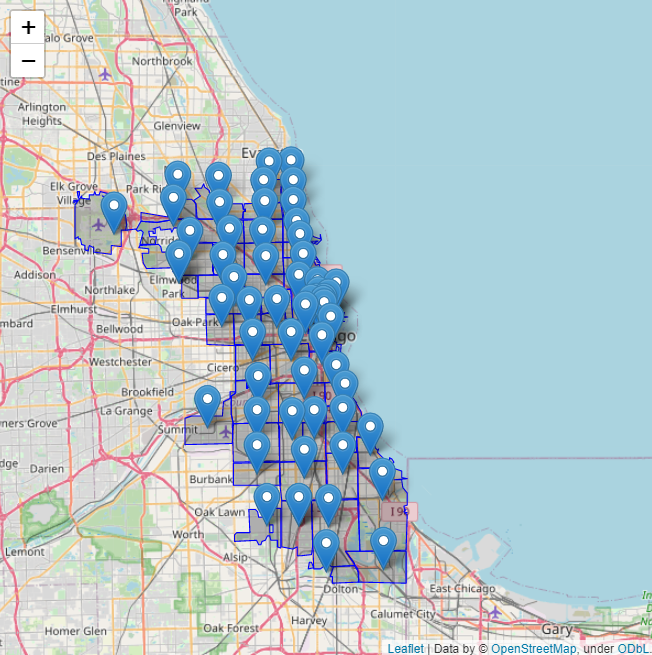

In [8]:
Image(r"C:\Users\josed\Documents\Proyecto_Final_IBM\IBM_Project\Figure1.PNG")

In [9]:
f2 = folium.Figure(width=600, height=600)
chicago_map_nh = folium.Map(location=[latitude, longitude], zoom_start=10).add_to(f2)
folium.Choropleth(geo_data=url_json_file,fill_color='black',line_color='red',fill_opacity=0.2,line_weight=1).add_to(chicago_map_nh)
for i in range(0,len(df_Nh)):
    folium.Marker([df_Nh.iloc[i]['latitude'], df_Nh.iloc[i]['longitude']], popup=df_Nh.iloc[i]['community areas']).add_to(chicago_map_nh)
chicago_map_nh

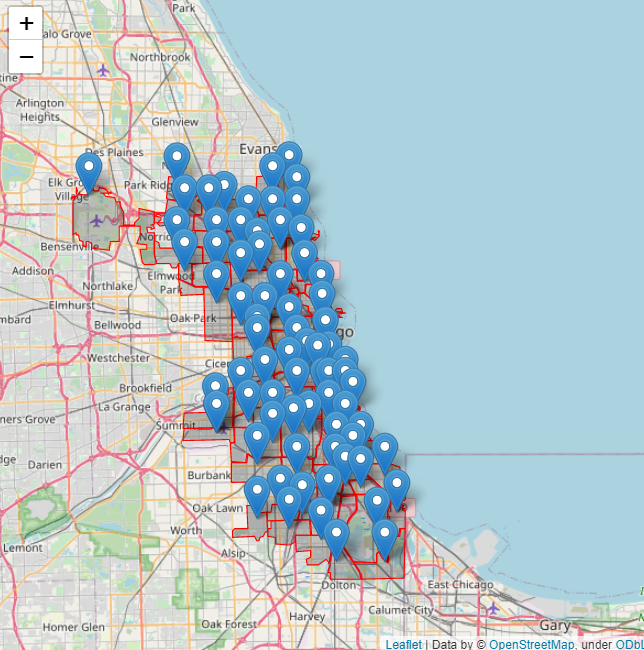

In [10]:
Image(r"C:\Users\josed\Documents\Proyecto_Final_IBM\IBM_Project\Figure2.PNG")

<h4>Extraction and reading Foursquare Chicago</h4>

The connection to Foursquare is configured:

In [11]:
CLIENT_ID = '0IOHE4TIWNFP3I4QLU13SS2E5QZ1R1SK3HXUJQMIJPS30NYK' # your Foursquare ID
CLIENT_SECRET = 'V1CGB3VUQAUA4133IUNZZON4TS3WPC42Z5NIR3BBQNBCUGID' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 500
categoryId = '4d4b7105d754a06374d81259'
near = 'Chicago'

Extraction of interesting places is done with the FourSquare API. the information is extracted for each of the Chicago zip codes:

In [12]:
venues_list = []
for i in range(len(df_geozipcode_Chicago)):
    lat = float(df_geozipcode_Chicago['Latitude'].iloc[[i]])
    long = float(df_geozipcode_Chicago['Longitude'].iloc[[i]])
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&categoryId={}&v={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,lat,long,categoryId,VERSION,radius,LIMIT)
    results = requests.get(url).json()
    items = results['response']['groups'][0]['items']
    for i in range(len(items)):
        try:
            venues_list.append([items[i]['venue']['name'],
                                items[i]['venue']['location']['lat'],
                                items[i]['venue']['location']['lng'],
                                items[i]['venue']['location']['postalCode'],
                                items[i]['venue']['location']['city'],
                                items[i]['venue']['categories'][0]['name'],
                                items[i]['venue']['categories'][0]['pluralName'],
                                items[i]['venue']['categories'][0]['shortName']])
        except:
            1

A dataframe is created with the data from Foursquare to be able to source information from our algorithm:

In [13]:
df_venues = pd.DataFrame(venues_list)
df_venues.columns = ['name_venue','latitude','longitude','Postalcode','City','Category','Category_Plural','Category_shortname']
df_venues.head()

name_venue   latitude  longitude Postalcode     City  \
0  Elliott's Pizza & Grill  41.898938 -87.736149      60651  Chicago   
1  Bill's Place Restaurant  41.902345 -87.735934      60651  Chicago   
2    Augusta Pizza & Grill  41.899038 -87.736251      60651  Chicago   
3         Seafood Junction  41.880618 -87.757804      60644  Chicago   
4   MacArthur's Restaurant  41.880611 -87.760757      60644  Chicago   

                          Category                   Category_Plural  \
0                      Pizza Place                      Pizza Places   
1                   Breakfast Spot                   Breakfast Spots   
2                      Pizza Place                      Pizza Places   
3               Seafood Restaurant               Seafood Restaurants   
4  Southern / Soul Food Restaurant  Southern / Soul Food Restaurants   

  Category_shortname  
0              Pizza  
1          Breakfast  
2              Pizza  
3            Seafood  
4    Southern / Soul

<h4>Analyzing the data by zip code</h4>

Preprocessing of the data is started for use in the K-Means algorithm:

In [14]:
df_venues_onehot = pd.get_dummies(df_venues[['Category']], prefix="", prefix_sep="")
df_venues_onehot['Postalcode'] = df_venues['Postalcode']
fixed_columns = [df_venues_onehot.columns[-1]] + list(df_venues_onehot.columns[:-1])
df_venues_onehot = df_venues_onehot[fixed_columns]
df_venues_onehot.head()

Postalcode  African Restaurant  American Restaurant  Arepa Restaurant  \
0      60651                   0                    0                 0   
1      60651                   0                    0                 0   
2      60651                   0                    0                 0   
3      60644                   0                    0                 0   
4      60644                   0                    0                 0   

   Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  \
0                       0                 0          0           0       0   
1                       0                 0          0           0       0   
2                       0                 0          0           0       0   
3                       0                 0          0           0       0   
4                       0                 0          0           0       0   

   Bistro  ...  Southern / Soul Food Restaurant  Steakhouse  Sushi Restaurant  \
0       0  ...                                0           0                 0   
1       0  ...                                0           0                 0   
2       0  ...                                0           0                 0   
3       0  ...                                0           0                 0   
4       0  ...                                1           0                 0   

   Taco Place  Tapas Restaurant  Tex-Mex Restaurant  Thai Restaurant  \
0           0                 0                   0                0   
1           0                 0                   0                0   
2           0                 0                   0                0   
3           0                 0                   0                0   
4           0                 0                   0                0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Wings Joint  
0                              0                      0            0  
1                              0                      0            0  
2                              0                      0            0  
3                              0                      0            0  
4                              0                      0            0  

[5 rows x 81 columns]

Grouping by postal code is performed and an average is obtained for each category

In [15]:
df_venues_grouped = df_venues_onehot.groupby('Postalcode').mean().reset_index()
df_venues_grouped.head(5)

Postalcode  African Restaurant  American Restaurant  Arepa Restaurant  \
0      30043                 0.0             0.000000          0.000000   
1      60171                 0.0             0.000000          0.000000   
2      60601                 0.0             0.027397          0.000000   
3      60602                 0.0             0.087500          0.000000   
4      60603                 0.0             0.018018          0.027027   

   Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  \
0                     0.0          0.000000   0.000000         0.0  0.0000   
1                     0.0          0.000000   0.000000         0.0  0.0000   
2                     0.0          0.000000   0.000000         0.0  0.0000   
3                     0.0          0.000000   0.000000         0.0  0.0875   
4                     0.0          0.036036   0.027027         0.0  0.0000   

   Bistro  ...  Southern / Soul Food Restaurant  Steakhouse  Sushi Restaurant  \
0     0.0  ...                              0.0    0.000000          0.000000   
1     0.0  ...                              0.0    0.000000          0.000000   
2     0.0  ...                              0.0    0.082192          0.000000   
3     0.0  ...                              0.0    0.000000          0.000000   
4     0.0  ...                              0.0    0.027027          0.018018   

   Taco Place  Tapas Restaurant  Tex-Mex Restaurant  Thai Restaurant  \
0    0.000000               0.0                 0.0              0.0   
1    0.000000               0.0                 0.0              0.0   
2    0.013699               0.0                 0.0              0.0   
3    0.012500               0.0                 0.0              0.0   
4    0.027027               0.0                 0.0              0.0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Wings Joint  
0                       0.000000                 0.0000          1.0  
1                       0.000000                 0.0000          0.0  
2                       0.027397                 0.0000          0.0  
3                       0.000000                 0.0375          0.0  
4                       0.027027                 0.0000          0.0  

[5 rows x 81 columns]

<h2>Analysis</h2><a name="analysis"></a>

<h3>Clustering by zip code</h3>

The K-Means algorithm is executed to generate the grouping and visualize which are the areas that have similar patterns based on the restaurant locations.  
Therefore, to know what the value of K is, we are going to visualize its error based on the variation of the number of clusters to decide which is the correct quantity:

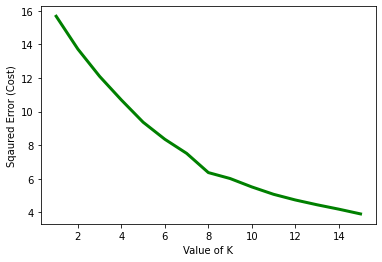

In [16]:
chicago_grouped_clustering = df_venues_grouped.drop('Postalcode', 1)
# run k-means clustering
cost =[] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=500).fit(chicago_grouped_clustering)      
    # calculates squared error for the clustered points 
    cost.append(kmeans.inertia_) 

plt.plot(range(1, 16), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

Looking at the graph above, we can say that the best number of clusters is 8. Now we are going to obtain the model and extract the labels to define the label of each postal code:

In [17]:
kmeans = KMeans(n_clusters=8, random_state=0, max_iter=500).fit(chicago_grouped_clustering)
# add clustering labels
df_venues_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
df_venues_grouped.loc[df_venues_grouped['Postalcode']=='60606-5702','Postalcode']='60606'
df_venues_grouped.loc[df_venues_grouped['Postalcode']=='60606-5133','Postalcode']='60606'
df_venues_grouped['Postalcode'] = df_venues_grouped['Postalcode'].astype('int')
df_geozipcode_Chicago.rename(columns={'Zip':'Postalcode'},inplace=True)
df_zipcode_Chicago_Col = pd.merge(df_geozipcode_Chicago, df_venues_grouped[['Cluster Labels','Postalcode']], on=['Postalcode'])

You define the colors for each label in the clusters and then plot them on a map:

In [18]:
Colores={0:'red',1:'blue',2:'green',3:'purple',4:'orange',5:'gray',6:'pink',7:'black'}

We graph the map with the marks defined by a color to show what type has been classified based on the K-Means algorithm:

In [19]:
f3 = folium.Figure(width=600, height=600)
chicago_map_zip_col = folium.Map(location=[latitude, longitude], zoom_start=10).add_to(f3)
folium.Choropleth(geo_data=json_file,fill_color='black',line_color='blue',fill_opacity=0.2,line_weight=1).add_to(chicago_map_zip_col)
for i in range(0,len(df_zipcode_Chicago_Col)):
    folium.Marker([df_zipcode_Chicago_Col.iloc[i]['Latitude'],
                  df_zipcode_Chicago_Col.iloc[i]['Longitude']],
                  popup=df_zipcode_Chicago_Col.iloc[i]['Postalcode'],
                  icon=folium.Icon(color=Colores[df_zipcode_Chicago_Col.iloc[i]['Cluster Labels']])).add_to(chicago_map_zip_col)
chicago_map_zip_col

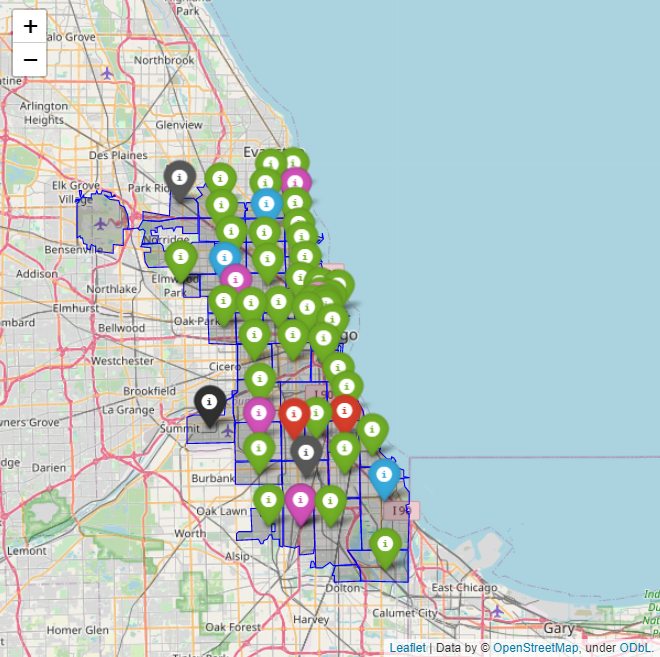

In [20]:
Image(r"C:\Users\josed\Documents\Proyecto_Final_IBM\IBM_Project\Figure3.PNG")

<h2>Results and Discussion</h2><a name="results"></a>

Based on our problem statement, we are going to define what would be the areas of Chicago where my family member could put his restaurant.  
I am going to choose to advise my relative to invest in a restaurant where the majority of postal codes are similar (marked with green color). This is due to the fact that they are very busy areas and where the variety of restaurants is greater. So the idea of investing in a restaurant in the other markers is undone.

<h2>Conclusion</h2><a name="conclusion"></a>

In conclusion, the implementation of the K-Means algorithm allows us to identify restaurant patterns to see how close and local they are in their characteristics.    